# Classification of chronic kidney desease

**Kidney disease** is defined as a heterogeneous group of disorders affecting kidney structure and function. It is recognized now that even mild abnormalities in measures of kidney structure and function are associated with increased risk for developing complications in other organ systems as well as mortality, all of which occur far more frequently than kidney failure. Duration of greater than 3 months is defined as chronic.


**Chronic kidney disease data:** Data used in this experiment can be found  <a href="https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease"> here </a>. Here is a summary of the features that influence kidney disease from   <a href="https://rdcu.be/b3Jy2"> Elhoseny, M et al2019 </a> article.

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-019-46074-2/MediaObjects/41598_2019_46074_Fig6_HTML.png" width=700 height=700 />


In [65]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np 
import pandas as pd
import models as m
from model_selection import *
import seaborn as sns

Using TensorFlow backend.


In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def Processing(path):
    """

    Clean the data by replacing the na_values by the mean 
    of the associated column. Take the path as argument.
    """
    data = pd.read_csv(path, na_values='?')
    for i in data.columns:
        for j in data[i]:
            if(isinstance(j,str)):
                l = [x for x in data[i].unique() if str(x) != 'nan']
                le = LabelEncoder()
                le.fit(l)
                y = le.transform(l)
                for k in range(len(l)):
                    data[i].replace(l[k],y[k], inplace = True)
    data.fillna(round(data.mean(), 2), inplace=True)
    data.to_csv("test.csv", sep=',', index=False)

Processing('data/ckd.csv')

data = pd.read_csv('test.csv',sep=',')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
Age      400 non-null float64
Bp       400 non-null float64
Sg       400 non-null float64
Al       400 non-null float64
Su       400 non-null float64
Rbc      400 non-null float64
Pc       400 non-null float64
Pcc      400 non-null float64
Ba       400 non-null float64
Bgr      400 non-null float64
Bu       400 non-null float64
Sc       400 non-null float64
Sod      400 non-null float64
Pot      400 non-null float64
Hemo     400 non-null float64
Pcv      400 non-null float64
Wbcc     400 non-null float64
Rbcc     400 non-null float64
Htn      400 non-null float64
Dm       400 non-null int64
Cad      400 non-null float64
Appet    400 non-null float64
pe       400 non-null float64
Ane      400 non-null float64
Class    400 non-null int64
dtypes: float64(23), int64(2)
memory usage: 78.2 KB


In [4]:
data.head()

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
0,48.0,80.0,1.020,1.0,0.0,0.81,1.0,0.0,0.0,121.00,...,44.0,7800.0,5.20,1.0,1,0.0,0.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,0.81,1.0,0.0,0.0,148.04,...,38.0,6000.0,4.71,0.0,0,0.0,0.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,1.00,1.0,0.0,0.0,423.00,...,31.0,7500.0,4.71,0.0,1,0.0,1.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,1.00,0.0,1.0,0.0,117.00,...,32.0,6700.0,3.90,1.0,0,0.0,1.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,1.00,1.0,0.0,0.0,106.00,...,35.0,7300.0,4.60,0.0,0,0.0,0.0,0.0,0.0,0


In [107]:
data.describe()

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483300,76.469100,1.017712,1.017300,0.450125,0.810300,0.772625,0.106100,0.055600,148.036900,...,38.883700,8406.121800,4.708275,0.369350,0.34250,0.085450,0.205525,0.190475,0.150375,0.375000
std,16.974966,13.476298,0.005434,1.272318,1.029487,0.308983,0.383751,0.306756,0.228199,74.782634,...,8.151082,2523.219976,0.840315,0.482023,0.47514,0.279166,0.404077,0.392677,0.357440,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.810000,0.770000,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,78.235000,1.020000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,38.880000,8406.120000,4.710000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450000,1.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


For the sake of visualisation let's look at the class distribution of some  numerical features. 

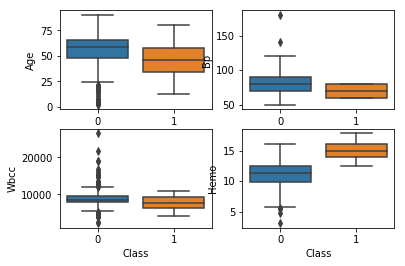

In [6]:
plt.subplot(221)
sns.boxplot(x = "Class", y = "Age",data=data)
plt.subplot(222)
sns.boxplot(x = "Class", y = "Bp",data=data)
plt.subplot(223)
sns.boxplot(x = "Class", y = "Wbcc",data=data)
plt.subplot(224)
sns.boxplot(x = "Class", y = "Hemo",data=data)


Number of components to explain 80% of the variance: 11


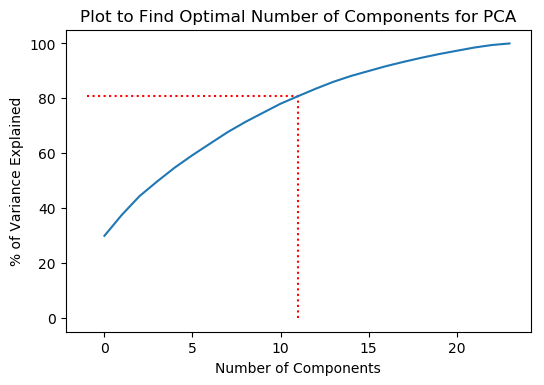

In [7]:
def PCA(Y,Nb):
    std_scale = preprocessing.StandardScaler().fit(Y)
    Y_scaled = std_scale.transform(Y)
    pca = decomposition.PCA(n_components=Nb-1)
    pca.fit(Y_scaled)
    var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
    plt.figure(dpi=100)
    plt.xlabel('Number of Components')
    plt.ylabel('% of Variance Explained')
    plt.title('Plot to Find Optimal Number of Components for PCA')
    plt.plot(var)
    c = np.where(var > 80)[0][0]
    y = var[c]
    plt.hlines(y = y,xmin=  -1, xmax= c, colors = "r", linestyles= 'dotted')
    plt.vlines(x = c,ymin=  0, ymax= y, colors = "r", linestyles= 'dotted')


    print("Number of components to explain 80% of the variance:",c)
    return pca

N=len(data.columns)
X = data.values[:,0:N-1]
pca=PCA(X,N)

**Remarque**: As can be seen, the first 11 components capture nearly 80% of the variance of the data.. The figure below shows a 2d representation of the data using the  first two principal components. This yields important insights on data separability, in the linear case for instance. 

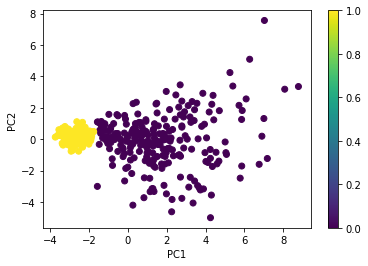

In [8]:
def plot_PCA(Y,Nb):
    std_scale = preprocessing.StandardScaler().fit(Y)
    Y_scaled = std_scale.transform(Y)
    pca = decomposition.PCA(n_components=Nb-1)
    pca.fit(Y_scaled)
    Y_projected = pca.transform(Y_scaled)
    plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=data.get("Class"))
    plt.colorbar()
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
plot_PCA(data.values[:,0:N-1],N)

In [9]:
plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=data.get("Class"))
plt.colorbar()
plt.xlabel("PC1")
plt.ylabel("PC2"

SyntaxError: unexpected EOF while parsing (<ipython-input-9-4ed619fb8ce4>, line 4)

In [10]:

pca_new=decomposition.PCA(n_components=11)
pca_new.fit(X)
x_new=pca_new.transform(X)
classe=data.get(data.columns[-1])
x_new_df=pd.DataFrame(x_new,columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11'])
y_new_df=pd.DataFrame(classe,columns=['Class'])
final_data=pd.concat([x_new_df,y_new_df],axis=1)

final_data
N=len(x_new_df.columns)

In [105]:
final_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,Class
0,-606.237509,-27.862984,-17.172770,-0.288903,4.892120,0.009384,3.624480,-1.194351,0.774925,-1.036385,0.830714,0
1,-2406.168984,0.044570,-41.422789,44.494593,-13.897455,6.188367,-9.232487,0.882157,0.563347,1.912215,2.381645,0
2,-905.115833,274.842947,-45.541734,1.211728,-2.242907,-2.902818,-4.468655,0.464184,-0.569740,0.210606,-0.565112,0
3,-1706.221333,-23.954136,5.581699,1.711397,-2.443513,27.481907,-3.135206,-7.830888,1.474515,0.201703,2.561386,0
4,-1106.287944,-41.768812,-23.444473,-5.391480,6.355837,3.608785,-6.410933,0.406418,0.709411,0.381691,0.855814,0


## Data preparation 

In [11]:
path = 'test.csv'
#target_name = 'target'
test_size= 0.3

In [46]:
df, X, y, X_train, X_test, y_train, y_test = load_data(path, test_size = test_size)


X_train : (280, 24)  y_train : (280,) X_test :  (120, 24) y test :  (120,)


In [50]:
#from sklearn.preprocessing import label_binarize

#y_train = label_binarize(y_train, classes = ['ckd', 'notckd'])
#y_test = label_binarize(y_test, classes = ['ckd', 'notckd'])

## Decision tree classification 

Let's first train a decision tree classifier with default parameters and evaluate it's preformance.

In [51]:
Decision_clf = m.DecisionTreeModel( train = True, X_train= X_train, y_train = y_train)

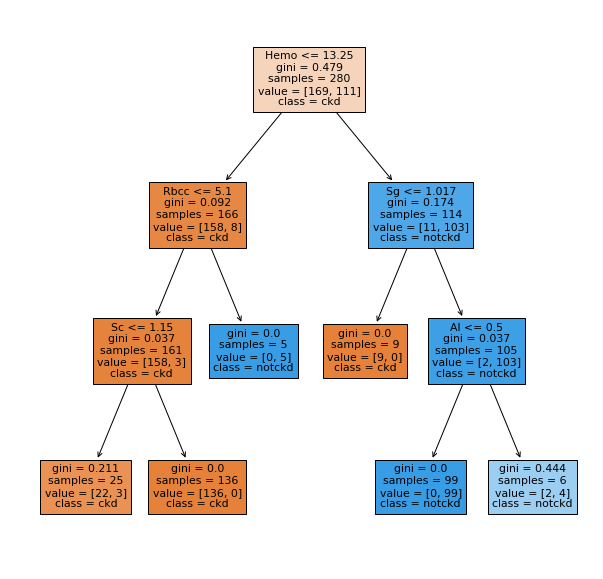

In [53]:
from sklearn import tree
plt.figure(figsize=(10, 10))

a = tree.plot_tree(Decision_clf, feature_names= data.columns[:-1], class_names= ['ckd', 'notckd'], filled=True) 
plt.show()

## Cross validation

Instead of using a train/validation split, we will evaluate performance using a **cross-validation** with 10 folds. Then, the fine-tuned model will be applied on the test set in order to to compare its  performance to other models. 

In [7]:
results = cross_validation(Decision_clf, X,y,epochs=100, batch_size=70, n_splits=10)

avg accuracy : 0.9358140272929228


## Prediction and performance

In [160]:
y_pred = m.predict(Decision_clf, X_test)
accuracy(y_test, y_pred)

Confusion Matrix: 
 [[120]]
Accuracy :  100.0
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120

   micro avg       1.00      1.00      1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



## Parameter tuning 

Here we will finetune this model using a grid search over a defined space of hyperparametres . The `search_pipeline` function uses the same cross_validation as before **on the training** set in order to find the best hyperparametre.

In [71]:
model = m.DecisionTreeModel( train = False)

In [72]:
param_grid = {'criterion': ['gini', 'entropy'],  
              'max_depth' : range(1,10),
              'min_samples_leaf': range(1,10) } 

In [73]:
gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train, model, param_grid ,scoring_fit = 'accuracy' )

In [11]:
best_parameters = get_best_parameters (gs )
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred>0.5)

les meilleurs paramètres sont  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1}
les meilleur score est  0.9822732012513035
Confusion Matrix: 
 [[238   1]
 [  2 171]]
Accuracy :  99.27184466019418
Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       239
           1       0.99      0.99      0.99       173

   micro avg       0.99      0.99      0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



# SVM

In [77]:
data_train = X_train, y_train
model = m.SVM( train = True, X_train= X_train, y_train = y_train, gamma= 'auto')

In [78]:
results = cross_validation(model, X_train,y_train,epochs=100, batch_size=70, n_splits=10);

avg accuracy : 0.6035714285714284


No handles with labels found to put in legend.


Confusion Matrix: 
 [[81  0]
 [39  0]]
Accuracy :  67.5
Report : 
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        81
           1       0.00      0.00      0.00        39

    accuracy                           0.68       120
   macro avg       0.34      0.50      0.40       120
weighted avg       0.46      0.68      0.54       120



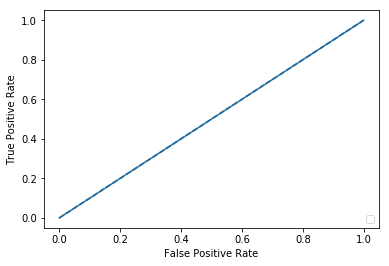

In [79]:
y_pred = m.predict(model, X_test)
accuracy(y_test, y_pred>0.5);
plot_roc(y_test,y_pred>0.5);

No handles with labels found to put in legend.


les meilleurs paramètres sont  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
les meilleur score est  0.8107142857142857
Confusion Matrix: 
 [[73  8]
 [10 29]]
Accuracy :  85.0
Report : 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        81
           1       0.78      0.74      0.76        39

    accuracy                           0.85       120
   macro avg       0.83      0.82      0.83       120
weighted avg       0.85      0.85      0.85       120



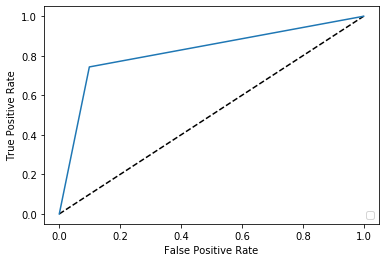

In [21]:
# defining parameter range 
model = m.SVM(train = False)
param_grid = {'C': [0.1, 1, 10, 100, 1000, 2000],  
              'gamma': [1, 0.1, 0.01,0.05, 0.001, 0.0001],
              'kernel': ['rbf']}  
gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train, model, param_grid ,scoring_fit = 'accuracy' )

best_parameters = get_best_parameters (gs )
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred>0.5)
plot_roc(y_test,y_pred>0.5)


# Random Forest

In [22]:
data_train = X_train, y_train
model = m.RandomForest(max_depth = 2, train = True, X_train= X_train, y_train = y_train)
y_pred = m.predict(model, X_test)
accuracy(y_test, y_pred)

Confusion Matrix: 
 [[78  3]
 [ 1 38]]
Accuracy :  96.66666666666667
Report : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        81
           1       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



In [23]:
results = cross_validation(model, X,y,epochs=100, batch_size=70, n_splits=10)

avg accuracy : 0.97


In [24]:
model = m.RandomForest(train = False)
param_grid = {'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'random_state':[42]}
  
    

gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train, model, param_grid ,scoring_fit = 'accuracy' )
best_parameters = get_best_parameters (gs )
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred>0.5)


les meilleurs paramètres sont  {'max_depth': 6, 'n_estimators': 11, 'random_state': 42}
les meilleur score est  0.9928571428571429
Confusion Matrix: 
 [[81  0]
 [ 0 39]]
Accuracy :  100.0
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



C:\Users\faull\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Neural Networks 

## Improved Multilayer perceptron

In [91]:
input_shape = (X_train.shape[1],)
MLP = m.build_MLP(input_shape = input_shape)
history = m.train(MLP,X_train, y_train, X_test, y_test, epochs = 5)

Test accuracy: 0.9916666746139526


In [86]:
help(cross_validation)

Help on function cross_validation in module model_selection:

cross_validation(model, X, Y, epochs=100, batch_size=70, n_splits=10, **kwargs)
    take a keras or sklearn model and perform cross validation.
    
    Parameteres:
    ___________
    model : keras.engine.sequential.Sequential or sklearn model
        the model upon which the cross validation is performes.
    X, y : np array
        correspond respectively to input and output data. 
    
    
    
    Author : Amine



In [90]:
cross_validation( m.build_MLP(input_shape = (input_shape,)), X_train,y_train,epochs = 5, n_splits=10)

Using Keras classifier
avg accuracy : 1.0


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [92]:
y_pred = m.predict(MLP, X_test)
accuracy(y_test, (y_pred>0.5).astype(float))

Confusion Matrix: 
 [[80  1]
 [ 0 39]]
Accuracy :  99.16666666666667
Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        81
           1       0.97      1.00      0.99        39

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [93]:
param_grid = {
              
              'batch_size':[ 70, 50, 60, 40],
              'epochs' :              [100,150,200],
              #'batch_size' :          [32, 128],
              #'optimizer' :           ['Adam'],
              #'dropout_rate' :        [0.1, 0.2, 0.3],
              #'activation' :          ['relu', 'elu']
             }

In [95]:
help(search_pipeline)

Help on function search_pipeline in module model_selection:

search_pipeline(X_train_data, X_test_data, y_train_data, model, param_grid, cv=10, scoring_fit='neg_mean_squared_error', do_probabilities=False, search_mode='GridSearchCV', n_iterations=0)
    Parameters tuning for sklearn and keras models. . 
    Made by Louis and Amine



In [97]:
MLP = m.build_MLP(input_shape = (input_shape,))
gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train, MLP, 
                                         param_grid ,scoring_fit = 'accuracy'
                                        )

In [104]:
best_parameters = get_best_parameters (gs )
cross_validation( m.build_MLP((24,)), X_train,y_train, n_splits=3, **best_parameters)

les meilleurs paramètres sont  {'batch_size': 70, 'epochs': 100}
les meilleur score est  1.0
Using Keras classifier
avg accuracy : 1.0


array([1., 1., 1.])

In [100]:
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred)

Confusion Matrix: 
 [[81  0]
 [ 0 39]]
Accuracy :  100.0
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

